In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 10.6MB/s]


In [3]:
def get_column ( data , index ) :
  column = []
  for row in data :
    column.append(row[index])
  return column

In [4]:
def prepare_data ( file_name_dataset ) :
  data = np.genfromtxt(file_name_dataset, delimiter =',', skip_header=1).tolist()
  N = len(data)

  #get tv (index=0)
  tv_data = get_column(data, 0)

  #get radio (index=1)
  radio_data = get_column(data, 1)

  #get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  #get sales (index=3)
  sales_data = get_column(data, 3)

  X = [tv_data, radio_data, newspaper_data]
  y = sales_data

  return X, y


In [5]:
X, y = prepare_data('advertising.csv')
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(lst)

[624.1, 175.10000000000002, 300.5, 78.9]


In [6]:
def initialize_params () :
  # w1 = random.gauss(mu =0.0, sigma =0.01)
  # w2 = random.gauss(mu =0.0, sigma =0.01)
  # w3 = random.gauss(mu =0.0, sigma =0.01)
  # b = 0

  w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
  return w1, w2, w3, b

In [7]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

# y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
# print(y)

In [8]:
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

l = compute_loss(y_hat=1, y =0.5)
print(l)

0.25


In [9]:
def compute_gradient_wi(xi, y, y_hat):
    return 2 * xi * (y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)


In [10]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [11]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - dl_dwi * lr

def update_weight_b(b, dl_db, lr):
    return b - dl_db * lr

In [12]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

after_b = update_weight_b(b=0.5, dl_db=-1, lr=1e-5)
print(after_b)

1.000005
0.50001


In [13]:
def implement_linear_regression(X_data, y_data,  epoch_max=50, lr=1e-5):

  losses = []
  w1 , w2 , w3 , b = initialize_params()

  N = len(y_data)

  for epoch in range(epoch_max):
    for i in range(N):

      # get data
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss(y_hat, y)
      losses.append(loss)

      # compute gradient
      dl_dw1 = compute_gradient_wi(x1 ,y ,y_hat)
      dl_dw2 = compute_gradient_wi(x2 ,y ,y_hat)
      dl_dw3 = compute_gradient_wi(x3 ,y ,y_hat)
      dl_db = compute_gradient_b(y ,y_hat)

      # update gradient
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b(b, dl_db, lr)

  return w1, w2, w3, b, losses


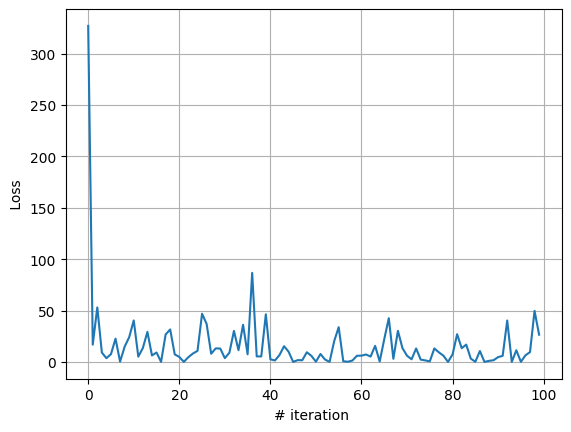

In [14]:
w1 , w2 , w3 ,b , losses = implement_linear_regression(X, y )
plt.plot(losses[:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.grid()
plt.show()

In [15]:
print(w1, w2, w3, b)

0.07405984066396477 0.15917360263437663 0.017561197559948935 0.13924260940219846


In [17]:
tv = 19.2
radio = 35.9
newspaper = 51.3
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
sales

8.176413319549823

In [20]:
def compute_loss2(y_hat, y):
    return (y_hat - y)

l = compute_loss2(y_hat=1, y =0.5)
l

0.5

In [37]:
X, y = prepare_data('advertising.csv')

In [51]:
def implement_linear_regression_nsamples(X_data, y_data,  epoch_max=1000, lr=1e-5):

  losses = []
  w1 , w2 , w3 , b = initialize_params()

  N = len(y_data)//10

  for epoch in range(epoch_max):

    loss_total = 0.0
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0

    for i in range(N):

      # get data
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss(y_hat, y)
      loss_total += loss

      # compute gradient
      dl_dw1 = compute_gradient_wi(x1 ,y ,y_hat)
      dl_dw2 = compute_gradient_wi(x2 ,y ,y_hat)
      dl_dw3 = compute_gradient_wi(x3 ,y ,y_hat)
      dl_db = compute_gradient_b(y ,y_hat)

      # update gradient
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b(b, dl_db, lr)

    losses.append(loss_total/N)

  return w1, w2, w3, b, losses

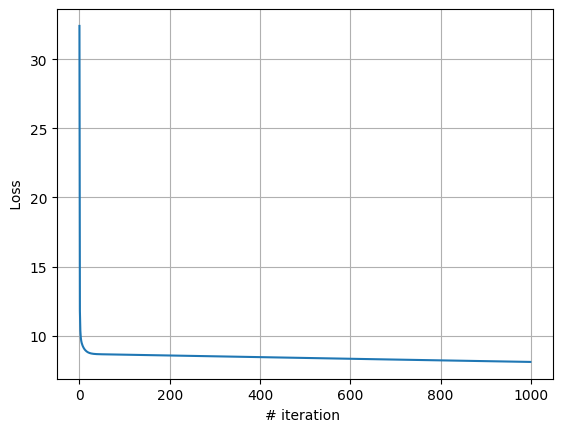

In [52]:
w1 , w2 , w3 ,b , losses = implement_linear_regression_nsamples(X, y )
plt.plot(losses)
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.grid()
plt.show()

In [48]:
print(w1, w2, w3, b)

0.06627755044484411 0.1283540861806469 0.03414220731773056 0.3205870131262579
